<a href="https://colab.research.google.com/github/SEONGHYUN99/ML-for-AI/blob/main/221013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
cd /content/MyDrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/MyDrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1
- Open ch5, 1-introducing_matplotlib.ipynb
- Introduce you to your teammates
- Try to fill in any figures
- Explain what you did to your teammates

<Figure size 1440x720 with 0 Axes>

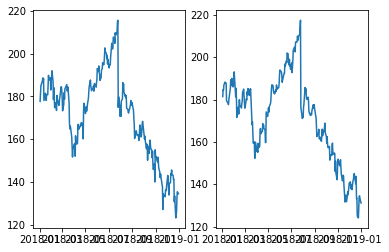

In [ ]:
fig = plt.figure(figsize=(20,10))
fig, axes = plt.subplots(1,2)
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

#정리 내용에 이거 추가하기!!
axes[0].plot(fb.index, fb.open)
axes[1].plot(fb.index, fb.close)

In [ ]:
fb.head(10)[['open','close']]

,open,close
date,,
2018-01-02,177.68,181.42
2018-01-03,181.88,184.67
2018-01-04,184.90,184.33
2018-01-05,185.59,186.85
2018-01-08,187.20,188.28
2018-01-09,188.70,187.87
2018-01-10,186.94,187.84
2018-01-11,188.40,187.77
2018-01-12,178.06,179.37


## Task 2
- Open ch5, 2-plotting_with_pandas.ipynb
- After practicing codes for below graphs, Try visualizing other countries of your choices


In [ ]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [ ]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

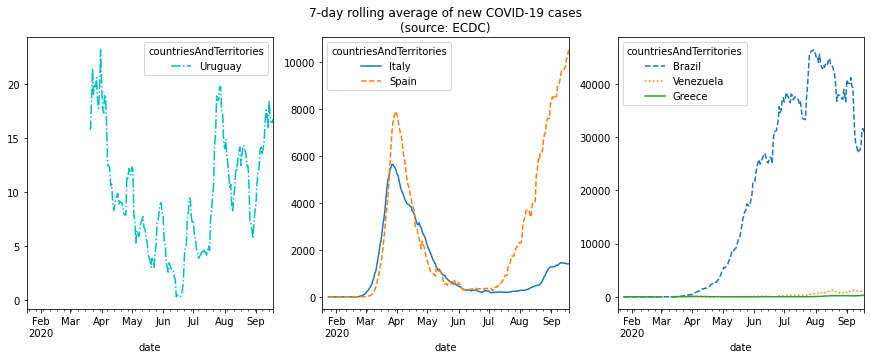

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['Uruguay']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'Venezuela', 'Greece']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

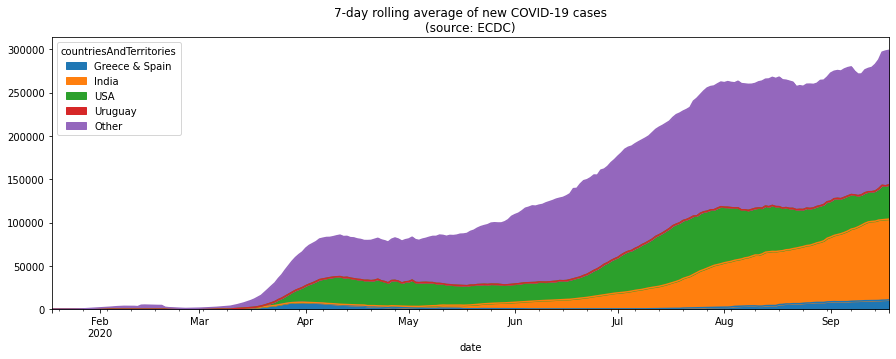

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Uruguay', 'India', 'Greece & Spain']
]
new_cases_rolling_average.assign(
    **{'Greece & Spain': lambda x: x.Greecev + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

## Task 3
- Change the graph below to stacked bar plot, and
normalized stacked bar plot (like below).

Text(0, 0.5, 'count')

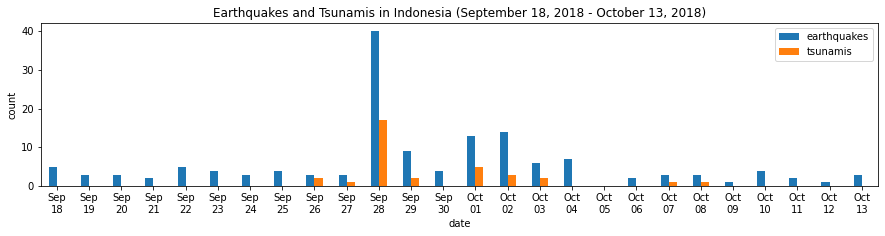

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

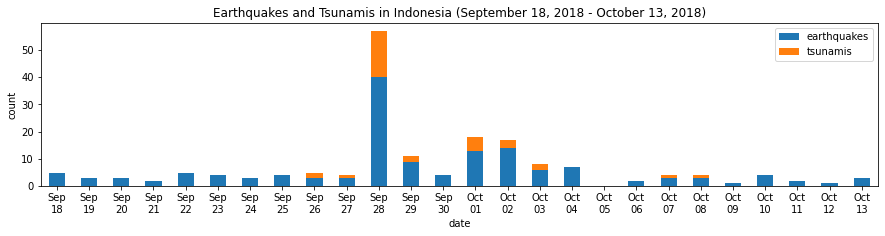

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked=True
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

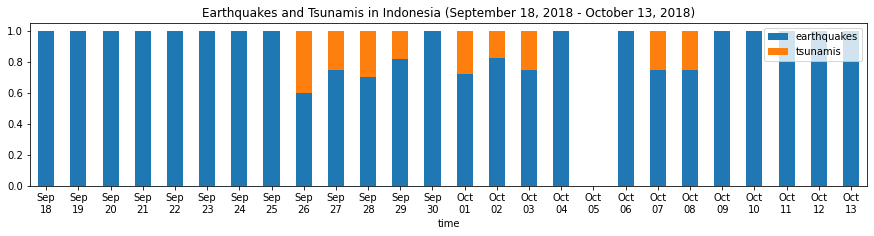

In [ ]:
indonesia_quakes[['tsunami', 'earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked = True
)